In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE #synthetic minority oversampling technique
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pickle

In [3]:
from xgboost import XGBClassifier
#XGBOOST IS EXTREME GRADIENT BOOSTING, advanced ML algo designed for efficiency,
#speed and high performance

It is an optimized implementation of Gradient Boosting and is a type of ensemble learning method that combines multiple weak models to form a stronger model.

XGBoost uses decision trees as its base learners and combines them sequentially to improve the model’s performance. Each new tree is trained to correct the errors made by the previous tree and this process is called boosting.
It has built-in parallel processing to train models on large datasets quickly. XGBoost also supports customizations allowing users to adjust model parameters to optimize performance based on the specific problem.


In [4]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [5]:
#loading data
df = pd.read_csv("/content/netflix_customer_churn.csv")

In [6]:
pd.set_option("display.max_columns", None)

In [7]:
df.head()

,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,a9b75100-82a8-427a-a208-72f24052884a,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action
1,49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi
2,4d71f6ce-fca9-4ff7-8afa-197ac24de14b,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama
3,d3c72c38-631b-4f9e-8a0e-de103cad1a7d,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror
4,4e265c34-103a-4dbb-9553-76c9aa47e946,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action


In [8]:
df.shape

(5000, 14)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             5000 non-null   object 
 1   age                     5000 non-null   int64  
 2   gender                  5000 non-null   object 
 3   subscription_type       5000 non-null   object 
 4   watch_hours             5000 non-null   float64
 5   last_login_days         5000 non-null   int64  
 6   region                  5000 non-null   object 
 7   device                  5000 non-null   object 
 8   monthly_fee             5000 non-null   float64
 9   churned                 5000 non-null   int64  
 10  payment_method          5000 non-null   object 
 11  number_of_profiles      5000 non-null   int64  
 12  avg_watch_time_per_day  5000 non-null   float64
 13  favorite_genre          5000 non-null   object 
dtypes: float64(3), int64(4), object(7)
memor

In [10]:
#dropping customer id as its not required for medelling
df = df.drop(columns = ["customer_id"])

In [11]:
for col in df.columns:
  print(col, df[col].unique())
  print('-'*50)

age [51 47 27 53 56 58 48 45 32 26 28 49 39 46 68 21 60 70 36 55 24 30 69 67
 23 57 35 22 34 19 25 54 31 42 63 66 38 65 43 64 62 41 18 61 37 20 50 33
 59 29 52 40 44]
--------------------------------------------------
gender ['Other' 'Female' 'Male']
--------------------------------------------------
subscription_type ['Basic' 'Standard' 'Premium']
--------------------------------------------------
watch_hours [14.73  0.7  16.32 ... 49.17 16.55  9.12]
--------------------------------------------------
last_login_days [29 19 10 12 13 26 20 56 34 36 38 23 33  7 32 40 27  4 57 43 18  6 55 53
 52  0 48 16 35 45  1 15 14 25 50 44 39 24 21 22 11 30 37 31 46 41  2  3
 51  9 54 17 49 42 28 59 58 60 47  5  8]
--------------------------------------------------
region ['Africa' 'Europe' 'Asia' 'Oceania' 'South America' 'North America']
--------------------------------------------------
device ['TV' 'Mobile' 'Laptop' 'Desktop' 'Tablet']
--------------------------------------------------
monthly_fe

In [12]:
df.columns #df[] = df[].astype() to change type if needed

Index(['age', 'gender', 'subscription_type', 'watch_hours', 'last_login_days',
       'region', 'device', 'monthly_fee', 'churned', 'payment_method',
       'number_of_profiles', 'avg_watch_time_per_day', 'favorite_genre'],
      dtype='object')

In [13]:
df[df['favorite_genre']==" "] #to check if there are any null values or blank spaces
#df[col_name] = df[col_name].replace([" " : "0.0" ]) to replace empty spaces with corresponding datatypes

,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre


In [14]:
#checking the class distribution of target column
print(df['churned'].value_counts())

churned
1    2515
0    2485
Name: count, dtype: int64


In [15]:
df.shape

(5000, 13)

In [16]:
df.describe()

,age,watch_hours,last_login_days,monthly_fee,churned,number_of_profiles,avg_watch_time_per_day
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,43.847400,11.649450,30.089800,13.683400,0.503000,3.024400,0.874800
std,15.501128,12.014654,17.536078,3.692062,0.500041,1.415841,2.619824
min,18.000000,0.010000,0.000000,8.990000,0.000000,1.000000,0.000000
25%,30.000000,3.337500,15.000000,8.990000,0.000000,2.000000,0.110000
50%,44.000000,8.000000,30.000000,13.990000,1.000000,3.000000,0.290000
75%,58.000000,16.030000,45.000000,17.990000,1.000000,4.000000,0.720000
max,70.000000,110.400000,60.000000,17.990000,1.000000,5.000000,98.420000


In [17]:
def plot_histogram(df,column_name):
  plt.figure(figsize= (5,3))
  sns.histplot(df[column_name], kde = True)
  plt.title(f"Distribution of {column_name}")
  #calculate mean and median values for the columns
  col_mean = df[column_name].mean()
  col_median = df[column_name].median()

  #adding vertical line for mean and median
  plt.axvline(col_mean, color='red', linestyle='--', label='Mean')
  plt.axvline(col_median, color='green', linestyle='-', label='Median')

  plt.legend()
  plt.show()

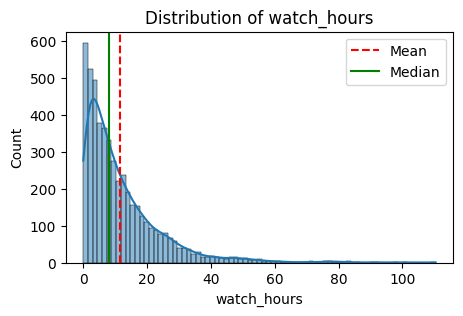

In [18]:
plot_histogram(df,'watch_hours')

one cannot work with skewed distribution data when working with models like logistic regression, lasso, linear regression or classification models like svm, etc. but in most cases we get skewed distribution, so we perform feature scaling called standard scaler. it transforms the data such that mean is 0 and std is 1, and hence we'll hv normal bell shaped curve.
tree basde models are not sensitive to this so its ok to leave the data without feature scaling.

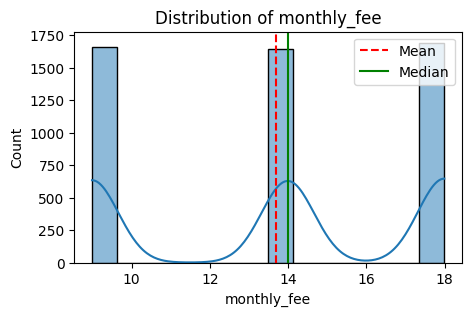

In [19]:
plot_histogram(df,'monthly_fee')

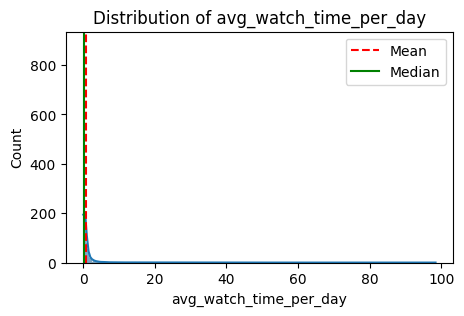

In [20]:
plot_histogram(df,'avg_watch_time_per_day')

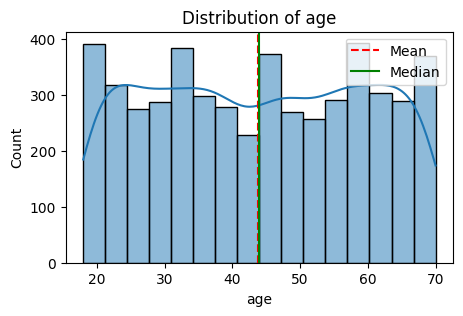

In [21]:
plot_histogram(df,'age')

In [22]:
#box plot of outliers and numerical features
def plot_boxplot(df,column_name):
  plt.figure(figsize= (5,3))
  sns.boxplot(y=df[column_name])
  plt.title(f"box plot of {column_name}")
  plt.ylabel(column_name)
  plt.show()

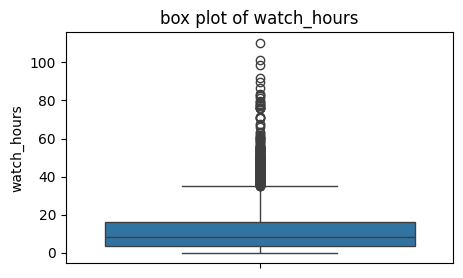

In [23]:
plot_boxplot(df,'watch_hours')

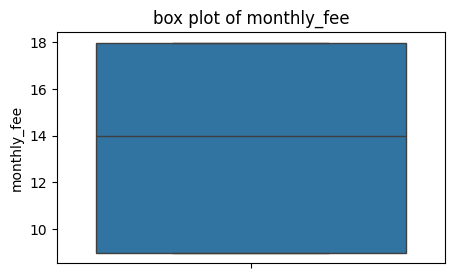

In [24]:
plot_boxplot(df,'monthly_fee')

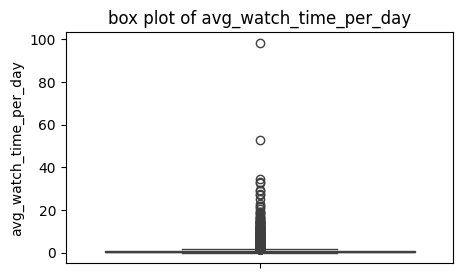

In [26]:
plot_boxplot(df,'avg_watch_time_per_day')

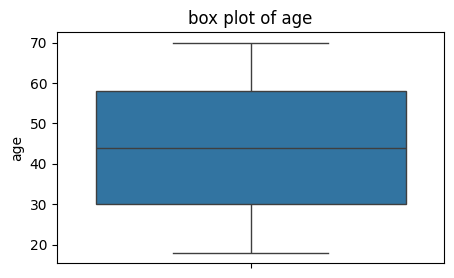

In [25]:
plot_boxplot(df,'age')

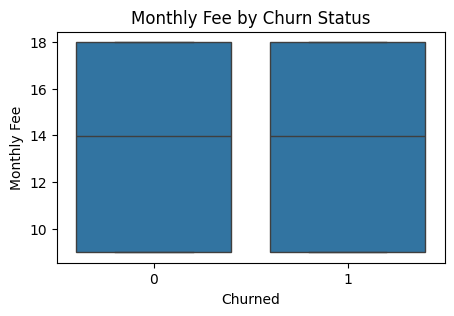

In [26]:
#comparing monthly fees by churn
plt.figure(figsize=(5,3))
sns.boxplot(x='churned', y='monthly_fee', data=df)
plt.title('Monthly Fee by Churn Status')
plt.xlabel('Churned')
plt.ylabel('Monthly Fee')
plt.show()

points above or below the lines are called outliers. incase of outliers, drop them or replace them with mean/median.

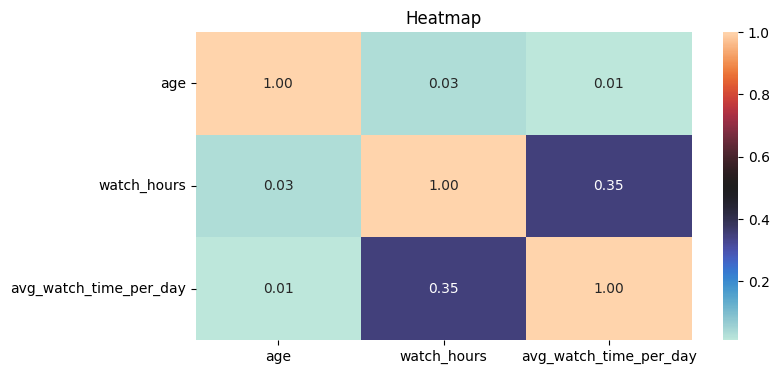

In [27]:
plt.figure(figsize=(8,4))
sns.heatmap(df[['age','watch_hours','avg_watch_time_per_day']].corr(), annot = True, cmap= 'icefire', fmt='.2f')
plt.title("Heatmap")
plt.show()

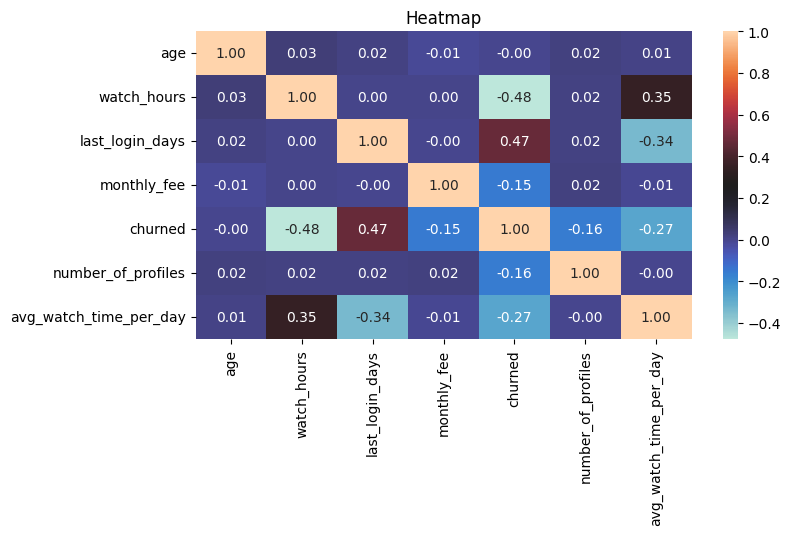

In [28]:
plt.figure(figsize=(8,4))
sns.heatmap(df[['age','watch_hours','last_login_days','monthly_fee','churned', 'number_of_profiles','avg_watch_time_per_day']].corr(), annot = True, cmap= 'icefire', fmt='.2f')
plt.title("Heatmap")
plt.show()

In [29]:
df.head(3)

,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action
1,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi
2,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama


In [30]:
# identifying columns with object data type
object_columns = df.select_dtypes(include="object").columns
print(object_columns)

Index(['gender', 'subscription_type', 'region', 'device', 'payment_method',
       'favorite_genre'],
      dtype='object')


In [31]:
# initialize a dictionary to save the encoders
encoders = {}

# apply label encoding and store the encoders
for column in object_columns:
  label_encoder = LabelEncoder()
  df[column] = label_encoder.fit_transform(df[column])
  encoders[column] = label_encoder


# save the encoders to a pickle file
with open("encoders.pkl", "wb") as f:
  pickle.dump(encoders, f)

In [32]:
encoders

{'gender': LabelEncoder(),
 'subscription_type': LabelEncoder(),
 'region': LabelEncoder(),
 'device': LabelEncoder(),
 'payment_method': LabelEncoder(),
 'favorite_genre': LabelEncoder()}

In [33]:
df.head()

,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,51,2,0,14.73,29,0,3,8.99,1,3,1,0.49,0
1,47,2,2,0.70,19,2,2,13.99,1,3,5,0.03,6
2,27,0,2,16.32,10,1,3,13.99,0,1,2,1.48,3
3,53,2,1,4.51,12,4,3,17.99,1,1,2,0.35,4
4,56,2,2,1.89,13,0,2,13.99,1,1,2,0.13,0


{
  'gender': {'Female': 0, 'Male': 1, 'Other': 2},

  'device': {'Desktop': 0, 'Laptop': 1, 'Mobile':2, 'TV':3, 'Tablet':4},

  'subscription_type' : {'Basic':0, 'Standard':1, 'Premium':2},

  'region' : {'Africa':0,'Asia':1,'Europe':2,'North America':3,'Oceania':4,'South America':5},

  'payment_method; : {'Credit card':0, 'Crypto':1, 'Debit card':2, 'Gift card':3, 'Paypal':4},
  
  'genre' : {'Action':0, 'Comedy':1, 'Documentary':2, 'Drama': 3, 'Horror':4, 'Romance':5, 'Sci-Fi':6}
}


In [34]:
#train-test split
#splitting feature and target
y = df["churned"]
X = df.drop(columns=["churned"])

In [35]:
# split training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
print(y_train.shape)

(4000,)


In [37]:
print(y_train.value_counts())

churned
1    2013
0    1987
Name: count, dtype: int64


In [ ]:
#no need of SMOTE as of now as the split seems close to symmetrical

In [38]:
#model training
#dictionary of different models
# dictionary of models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}

In [39]:
# dictionary to store the cross validation results
cv_scores = {}

# perform 5-fold cross validation for each model
for model_name, model in models.items():
  print(f"Training {model_name} with default parameters")
  scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
  cv_scores[model_name] = scores
  print(f"{model_name} cross-validation accuracy: {np.mean(scores):.2f}")
  print("-"*70)

Training Decision Tree with default parameters
Decision Tree cross-validation accuracy: 0.97
----------------------------------------------------------------------
Training Random Forest with default parameters
Random Forest cross-validation accuracy: 0.96
----------------------------------------------------------------------
Training XGBoost with default parameters
XGBoost cross-validation accuracy: 0.99
----------------------------------------------------------------------


In [41]:
cv_scores

{'Decision Tree': array([0.9825 , 0.97   , 0.97625, 0.95625, 0.95875]),
 'Random Forest': array([0.97375, 0.9675 , 0.96   , 0.95625, 0.96375]),
 'XGBoost': array([0.9925 , 0.99625, 0.9875 , 0.985  , 0.99   ])}

Evaluating with test data

In [42]:
#initially with xgboost since it has highest accuracy
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("\n=== XGBoost ===")
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("Accuracy Score:\n", accuracy_score(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


=== XGBoost ===
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       498
           1       1.00      0.99      1.00       502

    accuracy                           0.99      1000
   macro avg       1.00      1.00      0.99      1000
weighted avg       1.00      0.99      1.00      1000

Accuracy Score:
 0.995
Confusion Matrix:
 [[497   1]
 [  4 498]]


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:36:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [43]:
#Decision tree classifier
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)
y_pred_dt = dtc.predict(X_test)

print("\n=== Decision Tree ===")
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Accuracy Score:\n", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))


=== Decision Tree ===
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       498
           1       0.97      0.98      0.97       502

    accuracy                           0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000

Accuracy Score:
 0.971
Confusion Matrix:
 [[481  17]
 [ 12 490]]


In [44]:
#Random forest classifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)
y_pred_rf = rfc.predict(X_test)

print("\n=== Random Forest ===")
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Accuracy Score:\n", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


=== Random Forest ===
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       498
           1       0.98      0.97      0.98       502

    accuracy                           0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000

Accuracy Score:
 0.977
Confusion Matrix:
 [[489   9]
 [ 14 488]]


predictive system

In [56]:
model_data = {"model": rfc, "features_names": X.columns.tolist()}
with open("netflix_customer_churn.pkl", "wb") as f:
    pickle.dump(model_data, f)
with open("netflix_customer_churn.pkl", "rb") as f:
    model_data = pickle.load(f)

print(type(model_data))
print(model_data.keys())


<class 'dict'>
dict_keys(['model', 'features_names'])


In [58]:
loaded_model = model_data["model"]
feature_names = model_data["features_names"]

In [59]:
print(feature_names)

['age', 'gender', 'subscription_type', 'watch_hours', 'last_login_days', 'region', 'device', 'monthly_fee', 'payment_method', 'number_of_profiles', 'avg_watch_time_per_day', 'favorite_genre']


In [61]:
new_data = {
    'age' : 36,
    'gender' : 'Female',
    'subscription_type':'Premium',
    'watch_hours':17.07,
    'last_login_days':6,
    'region':'Asia',
    'device':'Laptop',
    'monthly_fee':13.99,
    'payment_method':'Crypto',
    'number_of_profiles':5,
    'avg_watch_time_per_day':13.17,
    'favorite_genre':'Horror'
}

In [62]:
new_data_df = pd.DataFrame([new_data])

In [63]:
with open("encoders.pkl", "rb") as f:
  encoders = pickle.load(f)

In [64]:
# encode categorical features using the saved encoders
for column, encoder in encoders.items():
  new_data_df[column] = encoder.transform(new_data_df[column])

# make a prediction
prediction = loaded_model.predict(new_data_df)
pred_prob = loaded_model.predict_proba(new_data_df)

print(prediction)

# results
print(f"Prediction: {'Churn' if prediction[0] == 1 else 'No Churn'}")
print(f"Prediciton Probability: {pred_prob}")

[0]
Prediction: No Churn
Prediciton Probability: [[1. 0.]]


In [ ]:
#in prediction prob list, 1 is the prob of no churn and 0 is the prob of churn